# 1. What is the weather like in Oslo?

**1.1 Open the latest weather forecast from the Norwegian forecast system (MEPS).**

In [1]:
#This is mostly to get familiar with xarray and cartopy, so let's go!

In [2]:
# import various packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy as cy
from matplotlib.dates import DateFormatter

In [3]:
#To get to the dataset you go to the MetCoOp website: https://thredds.met.no/thredds/catalog/mepslatest/catalog.html
#and pick up the latest .nc (netcdf) file

In [4]:
url='https://thredds.met.no/thredds/dodsC/aromearcticlatest/latest/arome_arctic_lagged_12_h_latest_2_5km_latest.nc'
ds = xr.open_dataset(url) #use of xarray
ds

<xarray.Dataset> Size: 10GB
Dimensions:                    (time: 58, ensemble_member: 4, pressure: 2,
                                height_above_msl: 1, height0: 1, height1: 1,
                                height2: 1, x: 739, y: 949)
Coordinates:
  * time                       (time) datetime64[ns] 464B 2024-08-10T12:00:00...
  * ensemble_member            (ensemble_member) int16 8B 0 1 2 3
  * pressure                   (pressure) float32 8B 850.0 925.0
  * height_above_msl           (height_above_msl) float32 4B 0.0
  * height0                    (height0) float32 4B 2.0
  * height1                    (height1) float32 4B 0.0
  * height2                    (height2) float32 4B 10.0
  * x                          (x) float32 3kB 2.786e+05 2.811e+05 ... 2.124e+06
  * y                          (y) float32 4kB -8.98e+05 ... 1.472e+06
    longitude                  (y, x) float64 6MB ...
    latitude                   (y, x) float64 6MB ...
Data variables: (12/15)
    forecast_reference_time    datetime64[ns] 8B ...
    projection_lambert         int32 4B ...
    x_wind_pl                  (time, pressure, ensemble_member, y, x) float32 1GB ...
    y_wind_pl                  (time, pressure, ensemble_member, y, x) float32 1GB ...
    air_temperature_pl         (time, pressure, ensemble_member, y, x) float32 1GB ...
    air_temperature_2m         (time, height0, ensemble_member, y, x) float32 651MB ...
    ...                         ...
    cloud_area_fraction        (time, height1, ensemble_member, y, x) float32 651MB ...
    air_pressure_at_sea_level  (time, height_above_msl, ensemble_member, y, x) float32 651MB ...
    precipitation_amount_acc   (time, height1, ensemble_member, y, x) float32 651MB ...
    snowfall_amount_acc        (time, height1, ensemble_member, y, x) float32 651MB ...
    wind_speed_of_gust         (time, height2, ensemble_member, y, x) float32 651MB ...
    fog_area_fraction          (time, height1, ensemble_member, y, x) float32 651MB ...
Attributes: (12/23)
    Conventions:                     CF-1.6, ACDD
    institution:                     Norwegian Meteorological Institute, MET ...
    institution_short_name:          NO/MET
    creator_url:                     met.no
    source:                          AROME-Arctic 2.5km
    title:                           AROME_Arctic 2.5km
    ...                              ...
    dataset_production_status:       Active
    iso_topic_category:              climatologyMeteorologyAtmosphere
    spatial_representation:          grid
    naming_authority:                no.met
    history:                         2024-08-10T14:22:34 creation by fimex
    DODS_EXTRA.Unlimited_Dimension:  time

**1.2 Change the 2-m temperature to deg C and assign the new attributes to your dataset. This is nice to do when you are plotting. xarray is looking for units, standard_name, and long_name when plotting.**

In [5]:
ds['air_temperature_2m'] = ds['air_temperature_2m'] - 273.15  # Convert from Kelvin to Celsius

# Now, the 'temperature_2m' variable in the dataset 'ds' is in degrees Celsius
print(ds['air_temperature_2m'])

<xarray.DataArray 'air_temperature_2m' (time: 58, height0: 1,
                                        ensemble_member: 4, y: 949, x: 739)> Size: 651MB
array([[[[[ 3.9274902 ,  3.9865723 ,  4.0510254 , ..., 18.837646  ,
           18.80542   , 18.75122   ],
          [ 3.9597168 ,  4.028076  ,  4.10083   , ..., 18.851807  ,
           18.823975  , 18.787354  ],
          [ 4.01001   ,  4.078369  ,  4.1467285 , ..., 18.874268  ,
           18.846924  , 18.801514  ],
          ...,
          [-0.32739258, -0.32739258, -0.31811523, ..., 15.075928  ,
           15.313232  , 15.459717  ],
          [-0.3317871 , -0.32739258, -0.32299805, ..., 15.030518  ,
           15.318115  , 15.514404  ],
          [-0.3137207 , -0.3317871 , -0.3137207 , ..., 15.057861  ,
           15.363525  , 15.564697  ]],

         [[ 4.7335205 ,  4.742798  ,  4.752075  , ..., 18.608032  ,
           18.589966  , 18.54895   ],
          [ 4.7559814 ,  4.7608643 ,  4.7701416 , ..., 18.608032  ,
           18.599243  

**1.3 Let us now select a grid point close to the meteorological station at Blindern and check if you selected the closest grid point.**

In [6]:
# Function to find a specific lat/lon location 

import math

def findindex(alat,alon,plat,plon):
    
    #finding identical location of **position** plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    
    #finding the minumum of the maximum differences:
        
    c = np.maximum(abslon,abslat)
    y, x = np.where(c == np.min(c))
    
    #-But why minumum of maximum and not minimum of minumum?
    #-By looking for the minimum of the maximum differences, the function ensures that a location isn't chosen based on a very small difference 
    # in just one dimension (either latitude or longitude). Instead, it tries to find a balanced point that's reasonably close in both dimensions.
    
    #print(alats[x,y],alon[x,y]) the **grid** points
    
    #these are the **indices** of latitude and longitude, that will indicate the right values inside these arrays
    
    x=int(x)
    y=int(y)
   
    return (y,x)

#Find a specific location, here the meteorological station at Blindern

lat= 59.94
lon = 10.72

[yloc,xloc] = findindex(ds.latitude,ds.longitude,lat,lon) 

#Note the number of dimentsions of the temperature array and cross-check with the metadata

# Check which coordinates were selected
print('latitude: {}; longitude: {}'.format(ds.latitude.isel(y = yloc, x = xloc).values.round(2), ds.longitude.isel(y = yloc, x = xloc).values.round(2)))

#t2m_point = ds.air_temperature_2m[:,0,1,xloc,yloc]
t2m_point = ds.air_temperature_2m.isel(height0 = 0, x = xloc, y = yloc, )

#print(ds['air_temperature_2m'].shape)

latitude: 63.75; longitude: 14.49


/tmp/ipykernel_52691/2071781991.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x=int(x)
/tmp/ipykernel_52691/2071781991.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y=int(y)


**1.4 Plot the point forecast of the 2-meter temperature, humidity, and wind forecast close to the Blindern station.**

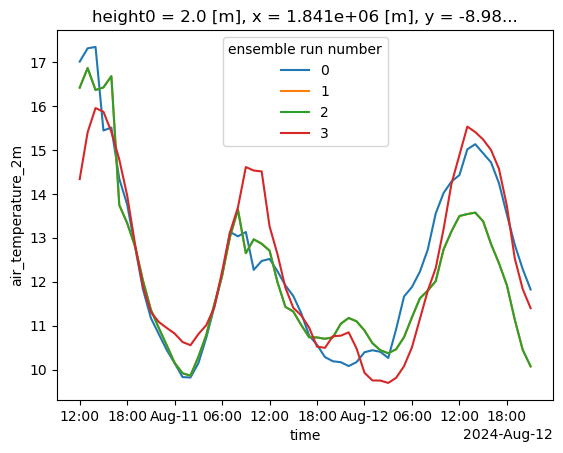

In [7]:
#Single-point temperature forecast:

f, ax = plt.subplots()                                   # define figure

t2m_point.plot.line(ax = ax, x='time', add_legend=True)  # plot with xarray.plot function

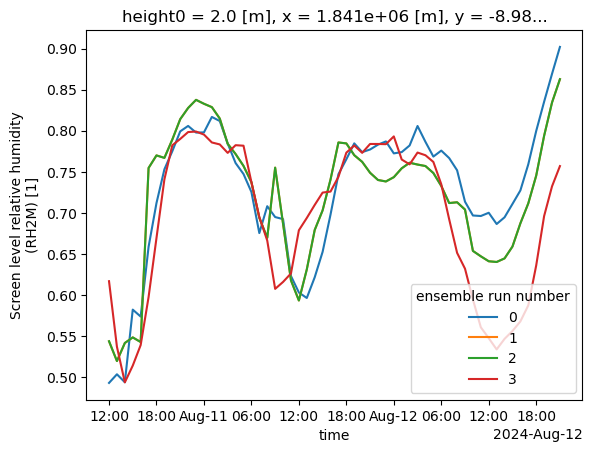

In [8]:
#Single-point humidity forecast:
hum2m_point = ds.relative_humidity_2m.isel(height0 = 0, x = xloc, y = yloc, )

f, ax = plt.subplots()                                   # define figure

hum2m_point.plot.line(ax = ax, x='time', add_legend=True)  # plot with xarray.plot function

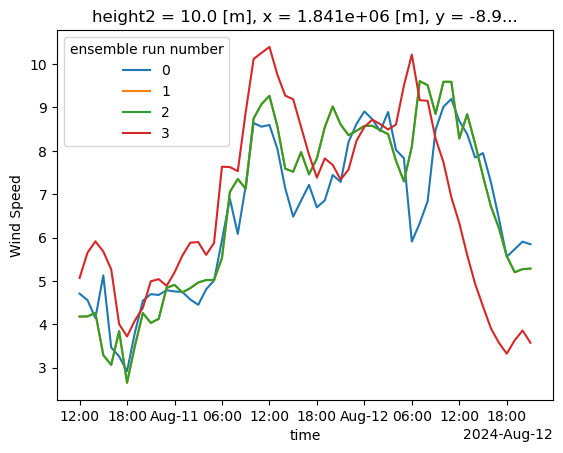

In [9]:
#Single-point wind forecast:

wind_speed= np.sqrt(ds.x_wind_10m.isel(height2 = 0, x = xloc, y = yloc)**2 + ds.y_wind_10m.isel(height2 = 0, x = xloc, y = yloc)**2)

f, ax = plt.subplots()                                    # define figure

wind_speed.plot.line(ax = ax, x='time', add_legend=True)  # plot with xarray.plot function
ax.set_ylabel("Wind Speed")                               # add y-axis label
plt.show()                                                # display the plot